In [32]:
import pandas as pd
import numpy as np

import plotly.express as px

from keplergl import KeplerGl
import geopandas as gpd

import seaborn as sns
import matplotlib.pyplot as plt

import os
import glob

%matplotlib inline

### LOAD DATA

In [33]:
path = ("/Users/pastudilloe/Library/CloudStorage/OneDrive-UniversidadSanFranciscodeQuito/2 - USFQ Data Hub/1 - DATA/")


In [34]:
senae_dic = pd.read_csv(path+'SENAE/senae_diccionario.csv')
senae_dic.head()

,sa_chap,Clasif_Hub,Descripcion
0,SECCIÓN I,A,ANIMALES VIVOS Y PRODUCTOS DEL REINO ANIMAL
1,1,A1,Animales vivos
2,2,A2,Carne y despojos comestibles
3,3,A3,"Pescados y crustáceos, moluscos y demás invert..."
4,4,A4,Leche y productos lácteos; huevos de ave; miel...


## EXPORTS

In [35]:
extension = 'csv'
os.chdir(path+'SENAE/')
files_exp = glob.glob('exp*.{}'.format(extension))
print(files_exp)

['exportaciones_2020.csv', 'exportaciones_2021.csv', 'exportaciones_2022.csv', 'exportaciones_2019.csv', 'exportaciones_2018.csv', 'exportaciones_2015.csv', 'exportaciones_2014.csv', 'exportaciones_2016.csv', 'exportaciones_2017.csv', 'exportaciones_2013.csv']


In [36]:
data_EXP = pd.concat([pd.read_csv(f) for f in files_exp ])
data_EXP[['Anio', 'Mes']] = data_EXP['date'].str.split('-', expand=True)
data_EXP['Anio'] = data_EXP['Anio'].astype(int)

data_EXP.head(2)

,date,TIPO_EXPORTACION,sa_chap,tip_merc,distr_code,distr_name,distr_ref,lat_distr,lng_distr,iso_destino,pais_destino,lat_destino,lng_destino,iso_origen,pais_origen,lat_origen,lng_origen,FOB,Anio,Mes
0,2020-01,EXP.GRAL.,1,Animales vivos,55,QUITO,Quito,-0.2186,-78.5097,US,Estados Unidos,37.09024,-95.712891,EC,Ecuador,-1.831239,-78.183406,91682.0,2020,01
1,2020-01,EXP.GRAL.,2,Carne y despojos comestibles,19,GUAYAQUIL(AEREO),Guayaquil,-2.1833,-79.8833,US,Estados Unidos,37.09024,-95.712891,EC,Ecuador,-1.831239,-78.183406,2088.0,2020,01


In [37]:
data_EXP_1 = data_EXP.groupby(['sa_chap','distr_code', 'distr_ref','iso_destino', 'pais_destino', 'Anio', 'Mes']).agg({'TIPO_EXPORTACION':'count', 'FOB':'sum'}).reset_index()
data_EXP_1.columns = ['sa_chap', 'distr_code', 'distr_ref', 'iso_destino', 'pais_destino', 'Anio', 'Mes', 'tip_export', 'fob']

data_EXP_1 = data_EXP_1.sort_values(['Anio', 'Mes'], ascending=[True, True])

data_EXP_1['sa_chap'] = data_EXP_1['sa_chap'].astype(str)
data_EXP_1 = pd.merge(data_EXP_1, senae_dic, how='left', on='sa_chap')

data_EXP_1['Descripcion_1'] = data_EXP_1['Descripcion'].str[:40]
data_EXP_1 = data_EXP_1.sort_values(by="fob", ascending = False)

data_EXP_1 = data_EXP_1[['distr_ref', 'iso_destino', 'pais_destino', 'Anio', 'Mes', 'Clasif_Hub', 'Descripcion', 'fob']]
data_EXP_1.columns = ['Ciudad_EC', 'ISO_destino', 'PAIS_destino', 'Anio', 'Mes', 'Clasif_Hub', 'Descripcion', 'Quantity FOB']

In [38]:
path1 = ("/Users/pastudilloe/Library/CloudStorage/OneDrive-UniversidadSanFranciscodeQuito/")
data_EXP_1.to_csv(path1 + 'DHub DATA for WEBSITE/EC_Exports.csv')  


In [39]:
data_EXP_2 = data_EXP.groupby(['iso_destino', 'pais_destino', 'Anio']).agg({'TIPO_EXPORTACION':'count', 'FOB':'sum'}).reset_index()
data_EXP_2 = data_EXP_2.loc[data_EXP_2['Anio'] != 2022]
data_EXP_2 = data_EXP_2.sort_values(['Anio'])

data_EXP_2_top = data_EXP_2.loc[data_EXP_2['FOB'] > 1e+09]
data_EXP_2_bottom = data_EXP_2.loc[data_EXP_2['FOB'] < 3e+03]

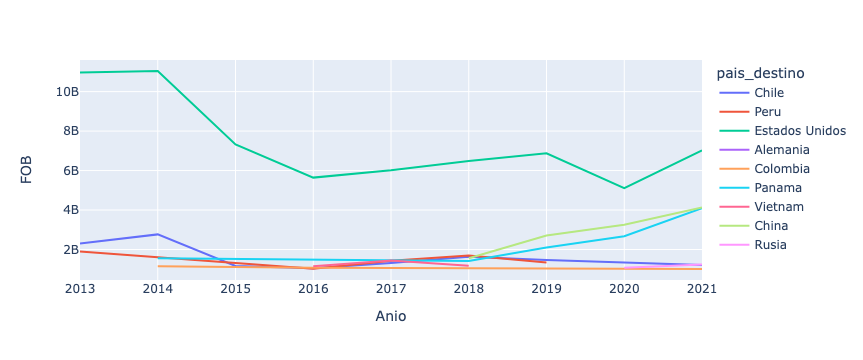

In [40]:
fig = px.line(data_EXP_2_top, x="Anio", y="FOB", color='pais_destino')
fig.show()

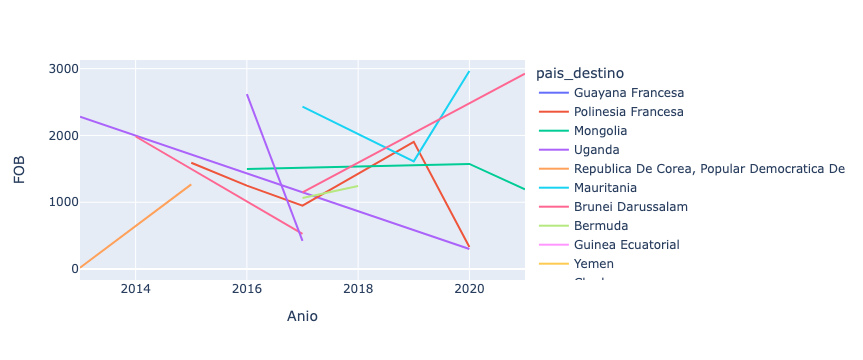

In [41]:
fig = px.line(data_EXP_2_bottom, x="Anio", y="FOB", color='pais_destino')
fig.show()

In [42]:
data_EXP_3 = data_EXP.groupby(['sa_chap', 'pais_destino', 'Anio']).agg({'FOB':'sum'}).reset_index()
data_EXP_3 = data_EXP_3.loc[data_EXP_3['Anio'] == 2021]
data_EXP_3 = data_EXP_3.sort_values(by="FOB", ascending = False).head(60)

data_EXP_3['sa_chap'] = data_EXP_3['sa_chap'].astype(str)
data_EXP_3 = pd.merge(data_EXP_3, senae_dic, how='left', on='sa_chap')

#data_EXP_3['short_str'] = data_EXP_3['long_str'].str.slice(0,3)

data_EXP_3['Descripcion_1'] = data_EXP_3['Descripcion'].str[:40]
data_EXP_3 = data_EXP_3.sort_values(by="FOB", ascending = False).head(50)


data_EXP_3_ = data_EXP_3.pivot("Descripcion_1", "pais_destino", "FOB")

data_EXP_3_a = data_EXP_3_.reindex(data_EXP_3_.sum().sort_values(ascending = False).index, axis = 1)
data_EXP_3_a = data_EXP_3_a.reindex(data_EXP_3_a.sum(axis = 1).sort_values(ascending = False).index)


[Text(0.5, 40.249999999999986, 'PAÍSES'),
 Text(138.24999999999997, 0.5, 'PRODUCTOS')]

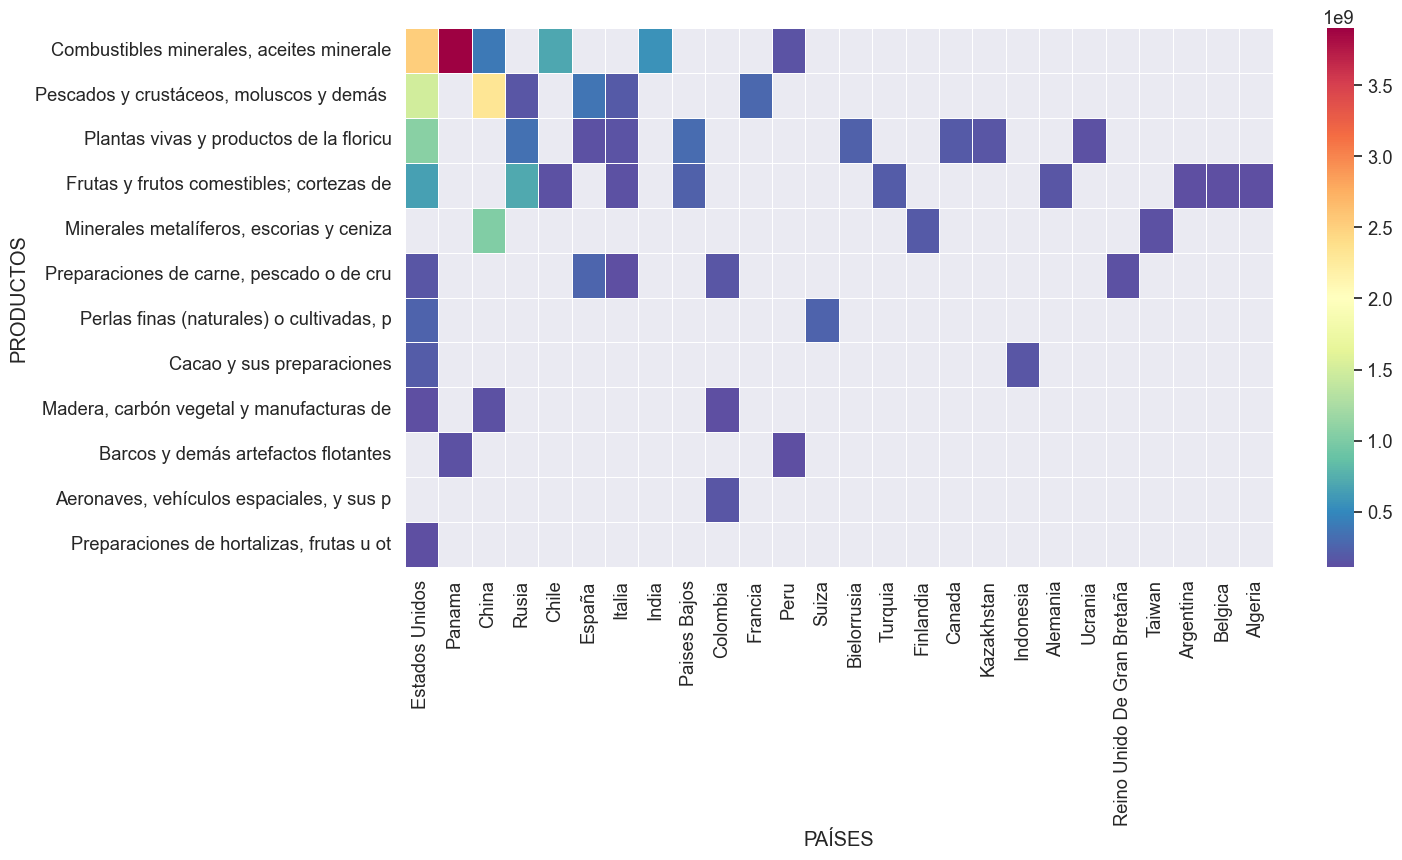

In [43]:
plt.figure(figsize=(14, 7))

sns.set(font_scale = 1.2)

ax = sns.heatmap(data_EXP_3_a, cmap="Spectral_r", linewidths = .5)
ax.set(xlabel='PAÍSES', ylabel='PRODUCTOS')


## IMPORTS

In [44]:
extension = 'csv'
os.chdir(path+'SENAE/')
files_imp = glob.glob('imp*.{}'.format(extension))
print(files_imp)

['importaciones_2015.csv', 'importaciones_2014.csv', 'importaciones_2016.csv', 'importaciones_2017.csv', 'importaciones_2013.csv', 'importaciones_2020.csv', 'importaciones_2021.csv', 'importaciones_2022.csv', 'importaciones_2019.csv', 'importaciones_2018.csv']


In [45]:
data_IMP = pd.concat([pd.read_csv(f) for f in files_imp ])
data_IMP[['Anio', 'Mes']] = data_IMP['date'].str.split('-', expand=True)
data_IMP['Anio'] = data_IMP['Anio'].astype(int)


In [46]:
data_IMP_1 = data_IMP.groupby(['chap','distr_code', 'distr_name','iso', 'pais', 'Anio', 'Mes']).agg({'tip_import':'count', 'fob':'sum'}).reset_index()
data_IMP_1.columns = ['sa_chap', 'distr_code', 'distr_ref', 'iso_procedencia', 'pais_procedencia', 'Anio', 'Mes', 'tip_export', 'fob']

data_IMP_1 = data_IMP_1.sort_values(['Anio', 'Mes'], ascending=[True, True])

data_IMP_1

,sa_chap,distr_code,distr_ref,iso_procedencia,pais_procedencia,Anio,Mes,tip_export,fob
0,1,19,Guayaquil-Aereo,BR,Brasil,2013,01,1,164034.138
4,1,19,Guayaquil-Aereo,CL,Chile,2013,01,1,68539.700
35,1,19,Guayaquil-Aereo,PE,Peru,2013,01,1,28480.000
120,1,19,Guayaquil-Aereo,US,Estados Unidos,2013,01,1,32302.000
173,1,55,Quito,AR,Argentina,2013,01,1,300.000
...,...,...,...,...,...,...,...,...,...
626058,98,82,Huaquillas,AR,Argentina,2022,05,1,33753.000
626095,98,82,Huaquillas,BR,Brasil,2022,05,1,35412.630
626165,98,82,Huaquillas,CO,Colombia,2022,05,1,16118.000
626267,98,82,Huaquillas,JP,Japon,2022,05,1,29000.010


In [55]:
data_IMP_1_ = data_IMP_1[['sa_chap', 'distr_ref', 'iso_procedencia', 'pais_procedencia', 'Anio', 'Mes', 'tip_export', 'fob']]

data_IMP_1_['sa_chap'] = data_IMP_1_['sa_chap'].astype(str)
data_IMP_1_ = pd.merge(data_IMP_1_, senae_dic, how='left', on='sa_chap')

data_IMP_1_ = data_IMP_1_[['distr_ref', 'iso_procedencia', 'pais_procedencia', 'Anio', 'Mes', 'Clasif_Hub', 'Descripcion', 'fob']]

data_IMP_1_.columns = ['Ciudad_EC', 'ISO_procedencia', 'PAIS_procedencia', 'Anio', 'Mes', 'Clasif_Hub', 'Descripcion', 'Quantity FOB']

data_IMP_1_.head()

/var/folders/33/60y9t0rs36zds7q6w6w6wkhm0000gn/T/ipykernel_94971/2629888848.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Ciudad_EC,ISO_procedencia,PAIS_procedencia,Anio,Mes,Clasif_Hub,Descripcion,Quantity FOB
0,Guayaquil-Aereo,BR,Brasil,2013,01,A1,Animales vivos,164034.138
1,Guayaquil-Aereo,CL,Chile,2013,01,A1,Animales vivos,68539.700
2,Guayaquil-Aereo,PE,Peru,2013,01,A1,Animales vivos,28480.000
3,Guayaquil-Aereo,US,Estados Unidos,2013,01,A1,Animales vivos,32302.000
4,Quito,AR,Argentina,2013,01,A1,Animales vivos,300.000


In [56]:
path1 = ("/Users/pastudilloe/Library/CloudStorage/OneDrive-UniversidadSanFranciscodeQuito/")
data_IMP_1_.to_csv(path1 + 'DHub DATA for WEBSITE/EC_Imports.csv')  


In [15]:
data_IMP_2 = data_IMP_1.groupby(['iso_procedencia', 'pais_procedencia', 'Anio']).agg({'fob':'sum'}).reset_index()
data_IMP_2 = data_IMP_2.loc[data_IMP_2['Anio'] != "2022"]

data_IMP_2_top = data_IMP_2.loc[data_IMP_2['fob'] > 8e+08]
data_IMP_2_top = data_IMP_2_top.sort_values(by = 'Anio')


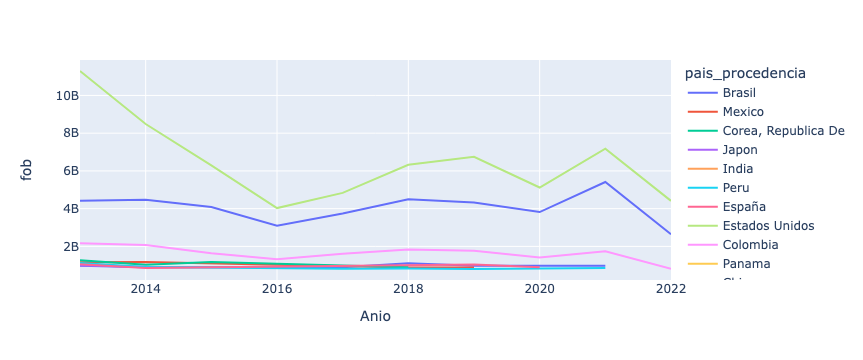

In [16]:
fig = px.line(data_IMP_2_top, x="Anio", y="fob", color='pais_procedencia')
fig.show()

In [17]:
data_IMP_3 = data_IMP_1.groupby(['sa_chap', 'pais_procedencia', 'Anio']).agg({'fob':'sum'}).reset_index()
data_IMP_3 = data_IMP_3.loc[data_IMP_3['Anio'] == 2021]
data_IMP_3 = data_IMP_3.sort_values(by="fob", ascending = False).head(60)

data_IMP_3['sa_chap'] = data_IMP_3['sa_chap'].astype(str)
data_IMP_3 = pd.merge(data_IMP_3, senae_dic, how='left', on='sa_chap')

data_IMP_3['Descripcion_1'] = data_IMP_3['Descripcion'].str[:40]
data_IMP_3 = data_IMP_3.sort_values(by="fob", ascending = False).head(50)

data_IMP_3_ = data_IMP_3.pivot("Descripcion_1", "pais_procedencia", "fob")

data_IMP_3_a = data_IMP_3_.reindex(data_IMP_3_.sum().sort_values(ascending = False).index, axis = 1)
data_IMP_3_a = data_IMP_3_a.reindex(data_IMP_3_a.sum(axis = 1).sort_values(ascending = False).index)

[Text(0.5, 40.249999999999986, 'PAÍSES'),
 Text(138.24999999999997, 0.5, 'PRODUCTOS')]

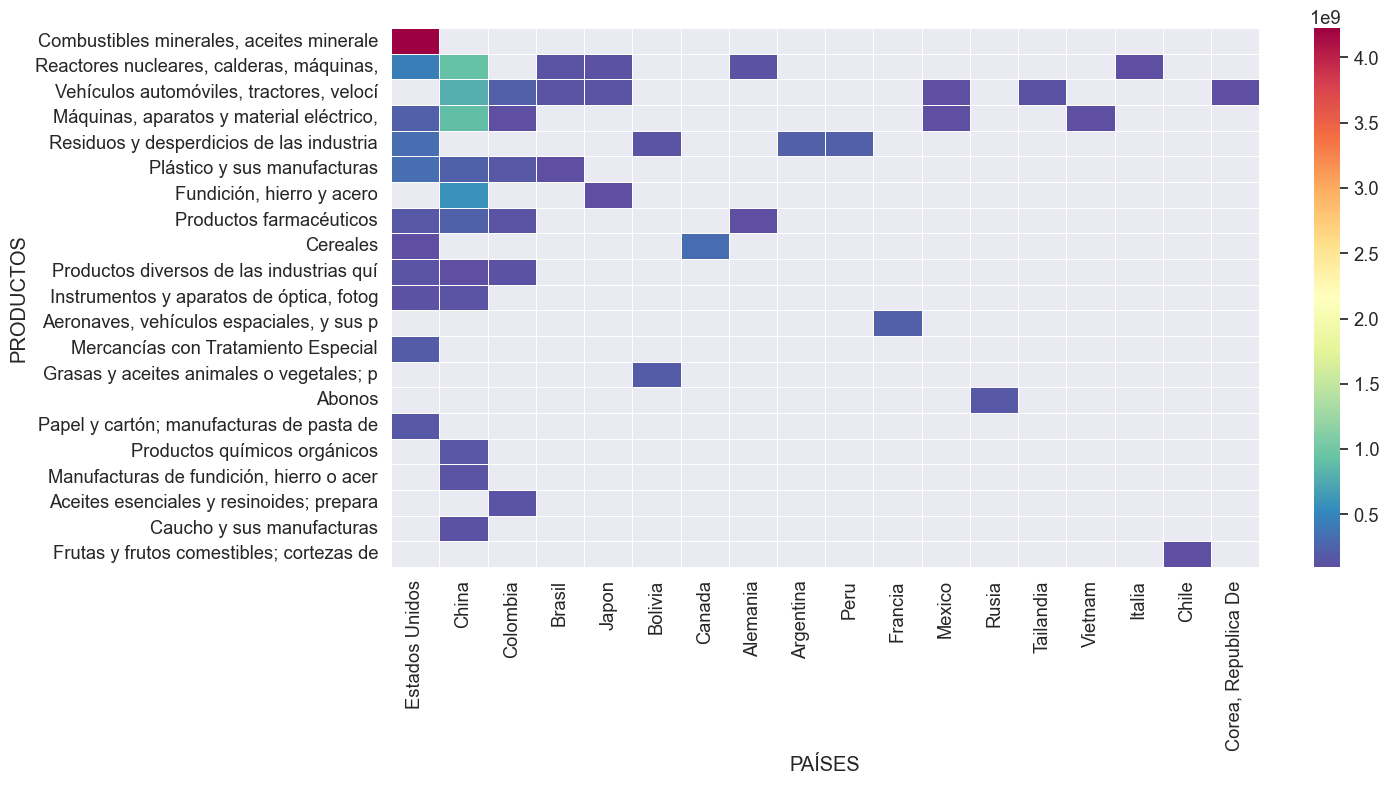

In [18]:
plt.figure(figsize=(14, 7))

sns.set(font_scale = 1.2)

ax = sns.heatmap(data_IMP_3_a, cmap="Spectral_r", linewidths = .5)
ax.set(xlabel='PAÍSES', ylabel='PRODUCTOS')
